In [3]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from matplotlib.colors import ListedColormap

from sklearn.datasets import load_wine

import os


In [4]:
data = load_wine()
X = data.data  # Features
y = data.target  # Target labels
feature_names = data.feature_names

cleanedDataset = pd.DataFrame(X, columns=feature_names)


In [5]:
cleanedDataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
cleanedDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [8]:
# Encode the target column if it's categorical
if cleanedDataset[cleanedDataset.columns.to_list()[-1]].dtype == 'object':
    cleanedDataset[cleanedDataset.columns.to_list()[-1]] = cleanedDataset[cleanedDataset.columns.to_list()[-1]].astype('category').cat.codes


In [9]:
cleanedDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

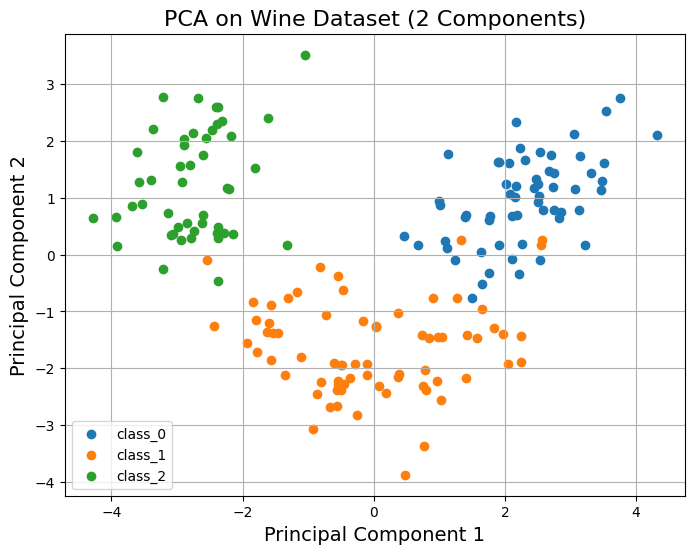

Explained Variance Ratio of each Principal Component:
[0.36198848 0.1920749 ]


In [ ]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y

# Visualize the PCA results
plt.figure(figsize=(8, 6))
for target in np.unique(y):
    subset = pca_df[pca_df['Target'] == target]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=data.target_names[target])

plt.title('PCA on Wine Dataset (2 Components)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Print the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio of each Principal Component:")
print(explained_variance)

In [13]:
X_pca.shape

(178, 2)

In [11]:
pca2 = PCA(n_components=4)
X_pca2 = pca2.fit_transform(X_scaled)

In [12]:
X_pca2.shape

(178, 4)